# Advanced Regression 
## Problem Statement:-
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.The company is looking at prospective properties to buy to enter the market.
It is required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
The company wants to know:
- Which variables are significant in predicting the price of a house
- How well those variables describe the price of a house
- Also, determine the optimal value of lambda for ridge and lasso regression

### Steps:-
1. Read, understand and prepare the data
2. Exploratory Data Analysis
3. Outlier Analysis / Transformation / Treatment
4. Modelling - Ridge and Lasso Regression
5. Model accurance & Metrics
5. Final analysis and conclusions

In [241]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime as dt
from matplotlib.pyplot import xticks
import os
pd.set_option('display.max_columns', None)

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#ML Libraries
from sklearn.preprocessing import scale
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
#checking the r2 score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [242]:
#Loading Data
housepr = pd.read_csv("C:/Users/aliborious/Downloads/train.csv")
housepr.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
5         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
6         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
7         Lvl    AllPub    Corner       Gtl       NWAmes       PosN   
8         Lvl    AllPub    Inside       Gtl      OldTown     Artery   
9         Lvl    AllPub    Corner       Gtl      BrkSide     Artery   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   
5       Norm     1Fam     1.5Fin            5            5       1993   
6       Norm     1Fam     1Story            8            5       2004   
7       Norm     1Fam     2Story            7            6       1973   
8       Norm     1Fam     1.5Fin            7            5       1931   
9     Artery   2fmCon     1.5Unf            5            6       1939   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
5          1995     Gable  CompShg     VinylSd     VinylSd       None   
6          2005     Gable  CompShg     VinylSd     VinylSd      Stone   
7          1973     Gable  CompShg     HdBoard     HdBoard      Stone   
8          1950     Gable  CompShg     BrkFace     Wd Shng       None   
9          1950     Gable  CompShg     MetalSd     MetalSd       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   
5         0.0        TA        TA       Wood       Gd       TA           No   
6       186.0        Gd        TA      PConc       Ex       TA           Av   
7       240.0        TA        TA     CBlock       Gd       TA           Mn   
8         0.0        TA        TA     BrkTil       TA       TA           No   
9       

In [243]:
housepr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [244]:
housepr.shape

(1460, 81)

## Insights:
1. Dataset has 1460 rows and 81 columns
2. Many columns seem to have NA values
3. Count of categorical columns = 38
4. Count of Categorical columns = 43

In [245]:
housepr['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [246]:
#Data Cleaning - Missing value treatment
#Cleaning up variable Alley (Replacing NA => No Alley Access)
housepr['Alley'].replace({np.nan:'No Alley Access'},inplace=True)
100*(housepr['Alley'].value_counts()/housepr['Alley'].count()).round(3)

No Alley Access    93.8
Grvl                3.4
Pave                2.8
Name: Alley, dtype: float64

In [247]:
#~94% values are of same category in Alley and hence dropping it
housepr=housepr.drop(['Alley'],axis=1)

In [248]:
housepr['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [249]:
#Cleaning up variable BsmtQual (Replacing NA => No Basement)
housepr['BsmtQual'].replace({np.nan:'No Basement'},inplace=True)
print(100*(housepr['BsmtQual'].value_counts()/housepr['BsmtQual'].count()).round(3))

TA             44.5
Gd             42.3
Ex              8.3
No Basement     2.5
Fa              2.4
Name: BsmtQual, dtype: float64


In [250]:
# Fa, No Basement & Ex can be combined as others
housepr['BsmtQual'].replace({'Fa':'Others'},inplace=True)
housepr['BsmtQual'].replace({'Ex':'Others'},inplace=True)
housepr['BsmtQual'].replace({'No Basement':'Others'},inplace=True)
print(100*(housepr['BsmtQual'].value_counts()/housepr['BsmtQual'].count()).round(3))

TA        44.5
Gd        42.3
Others    13.2
Name: BsmtQual, dtype: float64


In [251]:
housepr['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [252]:
#Cleaning up variable BsmtCond (Replacing NA => No Basement)
housepr['BsmtCond'].replace({np.nan:'No Basement'},inplace=True)
100*(housepr['BsmtCond'].value_counts()/housepr['BsmtCond'].count()).round(3)

TA             89.8
Gd              4.5
Fa              3.1
No Basement     2.5
Po              0.1
Name: BsmtCond, dtype: float64

In [253]:
# Fa, TA & Gd can be combined as OK
housepr['BsmtCond'].replace({'Fa':'OK'},inplace=True)
housepr['BsmtCond'].replace({'TA':'OK'},inplace=True)
housepr['BsmtCond'].replace({'Gd':'OK'},inplace=True)

# Po, No Basement can be combined as NOK
housepr['BsmtCond'].replace({'Po':'NOK'},inplace=True)
housepr['BsmtCond'].replace({'No Basement':'NOK'},inplace=True)
print(100*(housepr['BsmtCond'].value_counts()/housepr['BsmtCond'].count()).round(3))

OK     97.3
NOK     2.7
Name: BsmtCond, dtype: float64


In [254]:
#~97% values are of same category in BsmtCond and hence dropping it
housepr=housepr.drop(['BsmtCond'],axis=1)

In [255]:
housepr['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [256]:
#Cleaning up variable BsmtExposure (Replacing NA => No Basement)
housepr['BsmtExposure'].replace({np.nan:'No Basement'},inplace=True)
100*(housepr['BsmtExposure'].value_counts()/housepr['BsmtExposure'].count()).round(3)

No             65.3
Av             15.1
Gd              9.2
Mn              7.8
No Basement     2.6
Name: BsmtExposure, dtype: float64

In [257]:
#Cleaning up variable BsmtFinType1 (Replacing NA => No Basement)
housepr['BsmtFinType1'].replace({np.nan:'No Basement'},inplace=True)
100*(housepr['BsmtFinType1'].value_counts()/housepr['BsmtFinType1'].count()).round(3)

Unf            29.5
GLQ            28.6
ALQ            15.1
BLQ            10.1
Rec             9.1
LwQ             5.1
No Basement     2.5
Name: BsmtFinType1, dtype: float64

In [258]:
#Cleaning up variable BsmtFinType2 (Replacing NA => No Basement)
housepr['BsmtFinType2'].replace({np.nan:'No Basement'},inplace=True)
100*(housepr['BsmtFinType2'].value_counts()/housepr['BsmtFinType2'].count()).round(3)

Unf            86.0
Rec             3.7
LwQ             3.2
No Basement     2.6
BLQ             2.3
ALQ             1.3
GLQ             1.0
Name: BsmtFinType2, dtype: float64

In [259]:
#Analyzing all basement related columns / variables
Housepr_Basement=housepr[['BsmtQual','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']]
Housepr_Basement.head()

BsmtQual BsmtExposure BsmtFinType1 BsmtFinType2  BsmtFinSF1  BsmtFinSF2  \
0       Gd           No          GLQ          Unf         706           0   
1       Gd           Gd          ALQ          Unf         978           0   
2       Gd           Mn          GLQ          Unf         486           0   
3       TA           No          ALQ          Unf         216           0   
4       Gd           Av          GLQ          Unf         655           0   

   BsmtUnfSF  TotalBsmtSF  
0        150          856  
1        284         1262  
2        434          920  
3        540          756  
4        490         1145

<Figure size 1440x720 with 0 Axes>

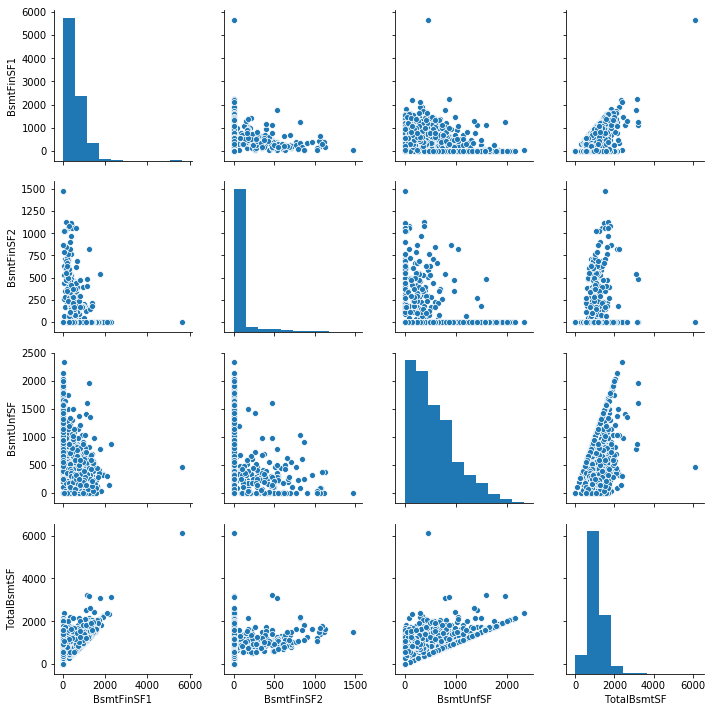

In [260]:
# Pair plot
plt.figure(figsize=(20, 10))
sns.pairplot(Housepr_Basement)
plt.show()

In [261]:
#As 'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF' seem to be lineraly correlated with TotalBsmtSF, keeping only TotalBsmtSF
housepr=housepr.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'],axis=1)

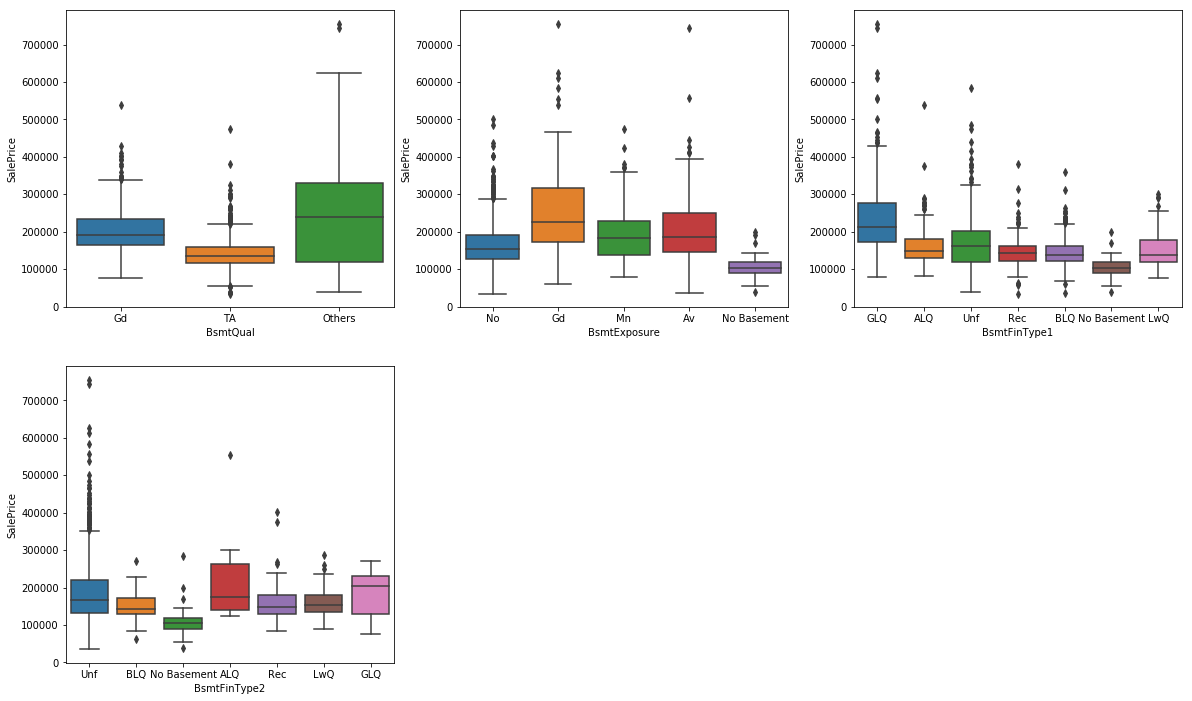

In [262]:
#Plotting the categorical variables Vs SalePrice
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'BsmtQual', y = 'SalePrice', data = housepr)
plt.subplot(2,3,2)
sns.boxplot(x = 'BsmtExposure', y = 'SalePrice', data = housepr)
plt.subplot(2,3,3)
sns.boxplot(x = 'BsmtFinType1',y = 'SalePrice', data = housepr)
plt.subplot(2,3,4)
sns.boxplot(x = 'BsmtFinType2',y = 'SalePrice', data = housepr)

In [263]:
#Dropping variables BsmtFinType1 and BsmtFinType2 as two do not seem to have a strong influence on sale price
housepr=housepr.drop(['BsmtFinType1','BsmtFinType2'],axis=1)

In [264]:
#Cleaning up variable FireplaceQu (Replacing NA => No Fireplace)
housepr['FireplaceQu'].replace({np.nan:'No Fireplace'},inplace=True)

print(100*(housepr['FireplaceQu'].value_counts()/housepr['FireplaceQu'].count()).round(3))

#Imputing level values of FireplaceQu
housepr['FireplaceQu'].replace({'Fa':'OK Fireplace'},inplace=True)
housepr['FireplaceQu'].replace({'TA':'OK Fireplace'},inplace=True)
housepr['FireplaceQu'].replace({'Gd':'OK Fireplace'},inplace=True)
housepr['FireplaceQu'].replace({'Ex':'OK Fireplace'},inplace=True)
housepr['FireplaceQu'].replace({'Po':'OK Fireplace'},inplace=True)
print(100*(housepr['FireplaceQu'].value_counts()/housepr['FireplaceQu'].count()).round(3))

No Fireplace    47.3
Gd              26.0
TA              21.4
Fa               2.3
Ex               1.6
Po               1.4
Name: FireplaceQu, dtype: float64
OK Fireplace    52.7
No Fireplace    47.3
Name: FireplaceQu, dtype: float64


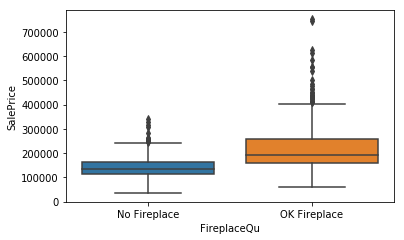

In [265]:
#Plotting the categorical variables related to FireplaceQu and checking correlation with SalePrice
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'FireplaceQu', y = 'SalePrice', data = housepr)

In [266]:
#Fireplace seem to have influence on Sale price
#Cleaning up variable GarageType (Replacing NA => No Garage)
housepr['GarageType'].replace({np.nan:'No Garage'},inplace=True)
100*(housepr['GarageType'].value_counts()/housepr['GarageType'].count()).round(3)

Attchd       59.6
Detchd       26.5
BuiltIn       6.0
No Garage     5.5
Basment       1.3
CarPort       0.6
2Types        0.4
Name: GarageType, dtype: float64

In [267]:
#Cleaning up variable GarageFinish (Replacing NA => No Garage)
housepr['GarageFinish'].replace({np.nan:'No Garage'},inplace=True)
100*(housepr['GarageFinish'].value_counts()/housepr['GarageFinish'].count()).round(3)

Unf          41.4
RFn          28.9
Fin          24.1
No Garage     5.5
Name: GarageFinish, dtype: float64

In [268]:
#Cleaning up variable GarageQual (Replacing NA => No Garage)
housepr['GarageQual'].replace({np.nan:'No Garage'},inplace=True)

print(100*(housepr['GarageQual'].value_counts()/housepr['GarageQual'].count()).round(3))

#Imputing level values of GarageQual
housepr['GarageQual'].replace({'TA':'OK Garage'},inplace=True)
housepr['GarageQual'].replace({'Fa':'OK Garage'},inplace=True)
housepr['GarageQual'].replace({'Gd':'OK Garage'},inplace=True)
housepr['GarageQual'].replace({'Ex':'OK Garage'},inplace=True)
housepr['GarageQual'].replace({'Po':'No Garage'},inplace=True)
print(100*(housepr['GarageQual'].value_counts()/housepr['GarageQual'].count()).round(3))

TA           89.8
No Garage     5.5
Fa            3.3
Gd            1.0
Ex            0.2
Po            0.2
Name: GarageQual, dtype: float64
OK Garage    94.2
No Garage     5.8
Name: GarageQual, dtype: float64


In [269]:
#Cleaning up variable GarageCond (Replacing NA => No Garage)
housepr['GarageCond'].replace({np.nan:'No Garage'},inplace=True)
print(100*(housepr['GarageCond'].value_counts()/housepr['GarageCond'].count()).round(3))

#Imputing level values of GarageCond
housepr['GarageCond'].replace({'TA':'OK'},inplace=True)
housepr['GarageCond'].replace({'Fa':'OK'},inplace=True)
housepr['GarageCond'].replace({'Gd':'OK'},inplace=True)
housepr['GarageCond'].replace({'Ex':'OK'},inplace=True)
housepr['GarageCond'].replace({'Po':'No Garage'},inplace=True)
print(100*(housepr['GarageCond'].value_counts()/housepr['GarageCond'].count()).round(3))

TA           90.8
No Garage     5.5
Fa            2.4
Gd            0.6
Po            0.5
Ex            0.1
Name: GarageCond, dtype: float64
OK           94.0
No Garage     6.0
Name: GarageCond, dtype: float64


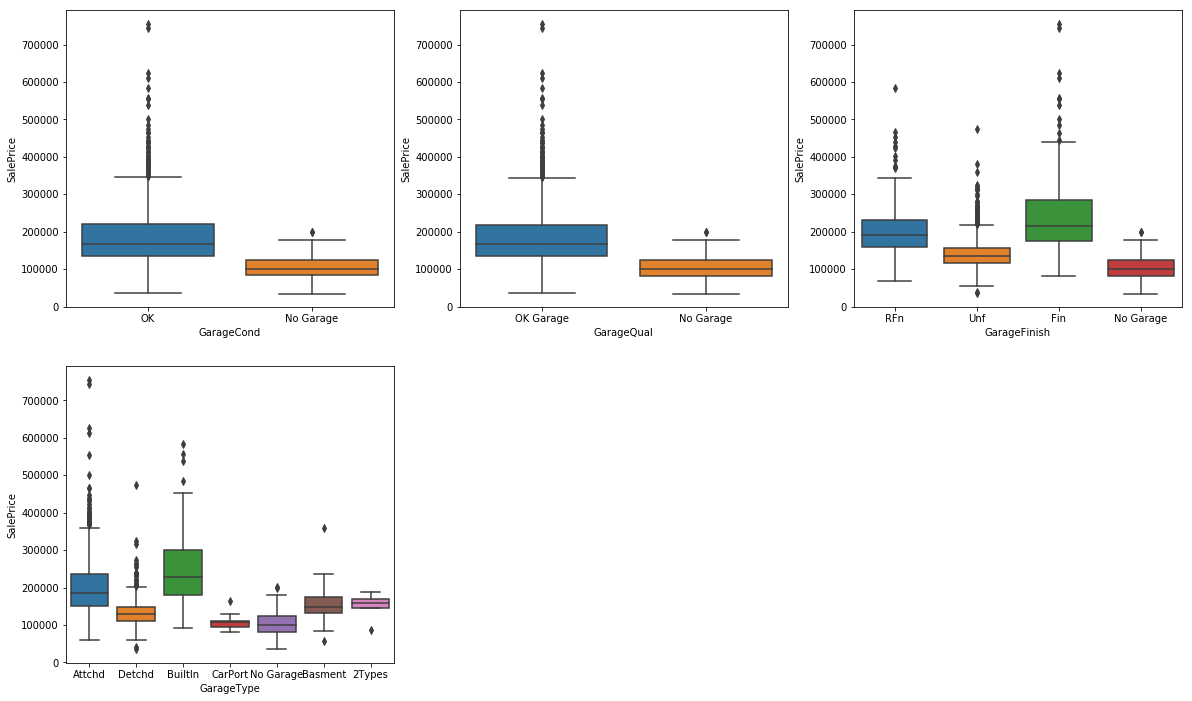

In [270]:
#Plotting the categorical variables Vs SalePrice
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'GarageCond', y = 'SalePrice', data = housepr)
plt.subplot(2,3,2)
sns.boxplot(x = 'GarageQual', y = 'SalePrice', data = housepr)
plt.subplot(2,3,3)
sns.boxplot(x = 'GarageFinish', y = 'SalePrice', data = housepr)
plt.subplot(2,3,4)
sns.boxplot(x = 'GarageType', y = 'SalePrice', data = housepr)

In [271]:
#GarageCond and GarageQual seem to be similar influence on sales prices as median values seem similar
housepr=housepr.drop(['GarageQual'],axis=1)
#Garage type - CarPort, No Garage, Basement, 2Types can be combined as "Others"
#Imputing values to "Others"
housepr['GarageType'].replace({'CarPort':'No Garage'},inplace=True)
housepr['GarageType'].replace({'Basment':'No Garage'},inplace=True)
housepr['GarageType'].replace({'No Garage':'No Garage'},inplace=True)
housepr['GarageType'].replace({'2Types':'No Garage'},inplace=True)
print(100*(housepr['GarageType'].value_counts()/housepr['GarageType'].count()))

Attchd       59.589041
Detchd       26.506849
No Garage     7.876712
BuiltIn       6.027397
Name: GarageType, dtype: float64


In [272]:
### Cleaning up variable PoolQC (Replacing NA => No Pool)
housepr['PoolQC'].replace({np.nan:'No Pool'},inplace=True)
print(100*(housepr['PoolQC'].value_counts()/housepr['PoolQC'].count()).round(3))

#Imputing level values of PoolQC
housepr['PoolQC'].replace({'Fa':'OK'},inplace=True)
housepr['PoolQC'].replace({'Gd':'OK'},inplace=True)
housepr['PoolQC'].replace({'Ex':'OK'},inplace=True)
print(100*(housepr['PoolQC'].value_counts()/housepr['PoolQC'].count()).round(3))

No Pool    99.5
Gd          0.2
Ex          0.1
Fa          0.1
Name: PoolQC, dtype: float64
No Pool    99.5
OK          0.5
Name: PoolQC, dtype: float64


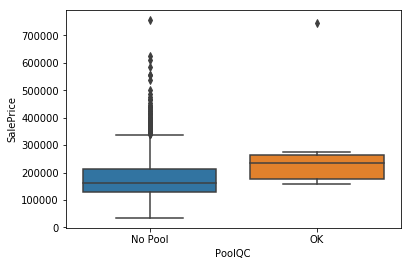

In [273]:
#Plotting PoolQC Vs Sales Price
sns.boxplot(x = 'PoolQC', y = 'SalePrice', data = housepr)

In [274]:
#PoolQC is only 0.4% of the houses so a small subset of data
#Sale Price is not strongly changing with Pool or No Pool, effects can be captured with Pool Area. Do dropping PoolQC
housepr=housepr.drop(['PoolQC'],axis=1)

In [275]:
#Cleaning up variable Fence (Replacing NA => No Fence)
housepr['Fence'].replace({np.nan:'No Fence'},inplace=True)
print(100*(housepr['Fence'].value_counts()/housepr['Fence'].count()).round(3))
#Imputing level values of Fence
housepr['Fence'].replace({'MnPrv':'Fence'},inplace=True)
housepr['Fence'].replace({'GdPrv':'Fence'},inplace=True)
housepr['Fence'].replace({'GdWo':'Fence'},inplace=True)
housepr['Fence'].replace({'MnWw':'Fence'},inplace=True)
print(100*(housepr['Fence'].value_counts()/housepr['Fence'].count()).round(3))

No Fence    80.8
MnPrv       10.8
GdPrv        4.0
GdWo         3.7
MnWw         0.8
Name: Fence, dtype: float64
No Fence    80.8
Fence       19.2
Name: Fence, dtype: float64


In [276]:
#Cleaning up variable MiscFeature (Replacing NA => No Fence)
housepr['MiscFeature'].replace({np.nan:'None'},inplace=True)
100*(housepr['MiscFeature'].value_counts()/housepr['MiscFeature'].count()).round(3)

None    96.3
Shed     3.4
Gar2     0.1
Othr     0.1
TenC     0.1
Name: MiscFeature, dtype: float64

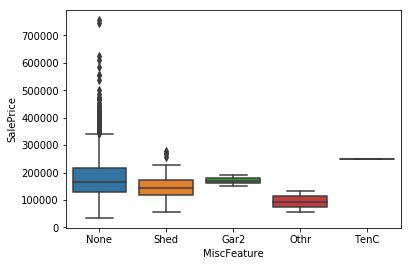

In [277]:
#Plotting MiscFeature Vs Sales Price
sns.boxplot(x = 'MiscFeature', y = 'SalePrice', data = housepr)

In [278]:
#MiscFeature levels are a minor subset in the dataset but seem to have a good influence on sale price
#Porch related data analysis
housepr_Porch=housepr[['OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch']]
housepr_Porch.head()

OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch
0           61              0          0            0
1            0              0          0            0
2           42              0          0            0
3           35            272          0            0
4           84              0          0            0

<Figure size 1440x720 with 0 Axes>

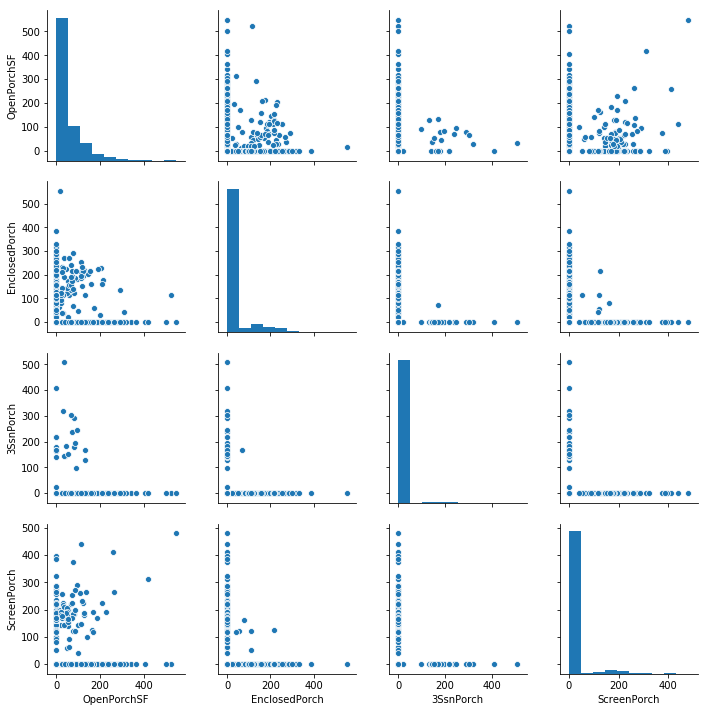

In [279]:
# pairwise scatter plot
plt.figure(figsize=(20, 10))
sns.pairplot(housepr_Porch)
plt.show()

In [280]:
#From the correlation pairplots, Out of four variables on Porch, we can capture key effects from Open Porch and Enclosed Porch
housepr=housepr.drop(['ScreenPorch','3SsnPorch'],axis=1)

In [281]:
print(100*(housepr['Neighborhood'].astype('category').value_counts()/housepr['Neighborhood'].count()).round(3))
#Imputing values of the minor category levels in Neighborhood
housepr['Neighborhood'].replace({'ClearCr':'Others'},inplace=True)
housepr['Neighborhood'].replace({'SWISU':'Others'},inplace=True)
housepr['Neighborhood'].replace({'StoneBr':'Others'},inplace=True)
housepr['Neighborhood'].replace({'Blmngtn':'Others'},inplace=True)
housepr['Neighborhood'].replace({'MeadowV':'Others'},inplace=True)
housepr['Neighborhood'].replace({'BrDale':'Others'},inplace=True)
housepr['Neighborhood'].replace({'Veenker':'Others'},inplace=True)
housepr['Neighborhood'].replace({'NPkVill':'Others'},inplace=True)
housepr['Neighborhood'].replace({'Blueste':'Others'},inplace=True)
print(100*(housepr['Neighborhood'].astype('category').value_counts()/housepr['Neighborhood'].count()).round(3))

NAmes      15.4
CollgCr    10.3
OldTown     7.7
Edwards     6.8
Somerst     5.9
Gilbert     5.4
NridgHt     5.3
Sawyer      5.1
NWAmes      5.0
SawyerW     4.0
BrkSide     4.0
Crawfor     3.5
Mitchel     3.4
NoRidge     2.8
Timber      2.6
IDOTRR      2.5
ClearCr     1.9
SWISU       1.7
StoneBr     1.7
Blmngtn     1.2
MeadowV     1.2
BrDale      1.1
Veenker     0.8
NPkVill     0.6
Blueste     0.1
Name: Neighborhood, dtype: float64
NAmes      15.4
Others     10.3
CollgCr    10.3
OldTown     7.7
Edwards     6.8
Somerst     5.9
Gilbert     5.4
NridgHt     5.3
Sawyer      5.1
NWAmes      5.0
SawyerW     4.0
BrkSide     4.0
Crawfor     3.5
Mitchel     3.4
NoRidge     2.8
Timber      2.6
IDOTRR      2.5
Name: Neighborhood, dtype: float64


In [282]:
#Binning of the Year built variable
#Creating bins to define the year periods - 1872-1925, 1925-1950,1950-1975, 1976-1990, 1991-2000,2001-2010
bins=[1872,1925,1950,1976,1991,2001,2010]
slot_names=['1872-1925','1925-1950','1950-1975','1976-1990','1991-2000','2001-2010']
housepr['YearBuilt']=pd.cut(housepr['YearBuilt'],bins,labels=slot_names,include_lowest=True)
print(100*(housepr['YearBuilt'].value_counts()/housepr['YearBuilt'].count()).round(3))

1950-1975    31.0
2001-2010    23.6
1991-2000    13.0
1925-1950    12.1
1872-1925    11.1
1976-1990     9.2
Name: YearBuilt, dtype: float64


In [283]:
#Binning of the YearRemodAdd variable
#Creating bins to define the year periods - 1872-1925, 1925-1950,1950-1975, 1976-1990, 1991-2000,2001-2010
bins=[1872,1950,1976,1991,2001,2010]
slot_names=['1872-1950','1950-1975','1976-1990','1991-2000','2001-2010']
housepr['YearRemodAdd']=pd.cut(housepr['YearRemodAdd'],bins,labels=slot_names,include_lowest=True)
100*(housepr['YearRemodAdd'].value_counts()/housepr['YearRemodAdd'].count()).round(3)

2001-2010    32.6
1950-1975    24.0
1991-2000    20.0
1872-1950    12.2
1976-1990    11.2
Name: YearRemodAdd, dtype: float64

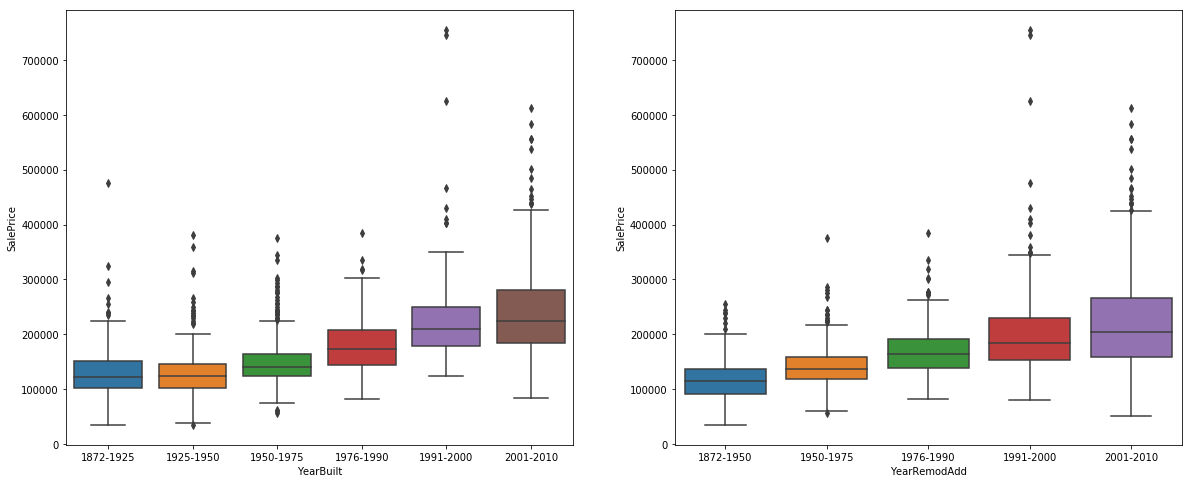

In [284]:
#Plotting the categorical variables related toYear Built and Year Remodified to find which ones have correlation and can be dropped
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.boxplot(x = 'YearBuilt', y = 'SalePrice', data = housepr)
plt.subplot(1,2,2)
sns.boxplot(x = 'YearRemodAdd', y = 'SalePrice', data = housepr)

In [285]:
# percentage of missing values in each column

def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False).round(2)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_data(housepr)

Total  Percent
LotFrontage      259    17.74
GarageYrBlt       81     5.55
MasVnrType         8     0.55
MasVnrArea         8     0.55
Electrical         1     0.07
SalePrice          0     0.00
YearRemodAdd       0     0.00
RoofStyle          0     0.00
RoofMatl           0     0.00
Exterior1st        0     0.00
Exterior2nd        0     0.00
ExterQual          0     0.00
OverallCond        0     0.00
ExterCond          0     0.00
Foundation         0     0.00
BsmtQual           0     0.00
BsmtExposure       0     0.00
TotalBsmtSF        0     0.00
YearBuilt          0     0.00
OverallQual        0     0.00
HeatingQC          0     0.00
HouseStyle         0     0.00
BldgType           0     0.00
Condition2         0     0.00
Condition1         0     0.00
Neighborhood       0     0.00
LandSlope          0     0.00
LotConfig          0     0.00
Utilities          0     0.00
LandContour        0     0.00
...              ...      ...
YrSold             0     0.00
MoSold             0     0.00
MiscVal            0     0.00
MiscFeature        0     0.00
Fence              0     0.00
PoolArea           0     0.00
EnclosedPorch      0     0.00
OpenPorchSF        0     0.00
WoodDeckSF         0     0.00
PavedDrive         0     0.00
GarageCond         0     0.00
GarageArea         0     0.00
GarageCars         0     0.00
GarageType         0     0.00
1stFlrSF           0     0.00
FireplaceQu        0     0.00
Fireplaces         0     0.00
Functional         0     0.00
TotRmsAbvGrd       0     0.00
KitchenQual        0     0.00
KitchenAbvGr       0     0.00
BedroomAbvGr       0     0.00
HalfBath           0     0.00
FullBath           0     0.00
BsmtHalfBath       0     0.00
BsmtFullBath       0     0.00
GrLivArea          0     0.00
LowQualFinSF       0     0.00
2ndFlrSF           0     0.00
Id                 0     0.00

[70 rows x 2 columns]

In [286]:
#Converting the binned year columns as object datatype
housepr['YearBuilt']=housepr['YearBuilt'].values.astype(np.object)
housepr['YearRemodAdd']=housepr['YearRemodAdd'].values.astype(np.object)

In [287]:
#Cleaning up variable LotFrontage (Replacing NA => 0)
housepr['LotFrontage'].replace({np.nan:'0'},inplace=True)
housepr['LotFrontage']=housepr['LotFrontage'].values.astype(np.int64)
100*(housepr['LotFrontage'].value_counts()/housepr['LotFrontage'].count())
housepr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 70 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null int64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null object
YearRemodAdd     1460 non-null object
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

In [288]:
#MasVnrArea: Masonry veneer area in square feet
100*(housepr['MasVnrType'].astype('category').value_counts()/housepr['MasVnrType'].count()).round(3)

None       59.5
BrkFace    30.6
Stone       8.8
BrkCmn      1.0
Name: MasVnrType, dtype: float64

In [289]:
#Replacing missing value with Unknown
housepr['Electrical'].replace({np.nan:'Unknown'},inplace=True)
print(100*(housepr['Electrical'].value_counts()/housepr['Electrical'].count()).round(3))
#Imputing the minor category levels of Electrical
housepr['Electrical'].replace({'FuseA':'Other'},inplace=True)
housepr['Electrical'].replace({'FuseF':'Other'},inplace=True)
housepr['Electrical'].replace({'FuseP':'Other'},inplace=True)
housepr['Electrical'].replace({'Mix':'Other'},inplace=True)
housepr['Electrical'].replace({'Unknown':'Other'},inplace=True)
print(100*(housepr['Electrical'].value_counts()/housepr['Electrical'].count()).round(3))

SBrkr      91.4
FuseA       6.4
FuseF       1.8
FuseP       0.2
Unknown     0.1
Mix         0.1
Name: Electrical, dtype: float64
SBrkr    91.4
Other     8.6
Name: Electrical, dtype: float64


In [290]:
# checking whether some rows have more than 1 missing values
len(housepr[housepr.isnull().sum(axis=1) > 1].index)

8

In [291]:
#NULL Rows in MasVnrType 
housepr=housepr.dropna(how='any',axis=0)

In [292]:
#Dropping column MasVnrarea and LotFrontage as these are not adding value
housepr=housepr.drop(['MasVnrArea','LotFrontage'],axis=1)

In [293]:
missing_data(housepr)

Total  Percent
SalePrice          0      0.0
ExterQual          0      0.0
YearRemodAdd       0      0.0
RoofStyle          0      0.0
RoofMatl           0      0.0
Exterior1st        0      0.0
Exterior2nd        0      0.0
MasVnrType         0      0.0
ExterCond          0      0.0
SaleCondition      0      0.0
Foundation         0      0.0
BsmtQual           0      0.0
BsmtExposure       0      0.0
TotalBsmtSF        0      0.0
Heating            0      0.0
HeatingQC          0      0.0
YearBuilt          0      0.0
OverallCond        0      0.0
OverallQual        0      0.0
HouseStyle         0      0.0
BldgType           0      0.0
Condition2         0      0.0
Condition1         0      0.0
Neighborhood       0      0.0
LandSlope          0      0.0
LotConfig          0      0.0
Utilities          0      0.0
LandContour        0      0.0
LotShape           0      0.0
Street             0      0.0
...              ...      ...
YrSold             0      0.0
MoSold             0      0.0
MiscVal            0      0.0
MiscFeature        0      0.0
Fence              0      0.0
PoolArea           0      0.0
EnclosedPorch      0      0.0
OpenPorchSF        0      0.0
WoodDeckSF         0      0.0
PavedDrive         0      0.0
GarageCond         0      0.0
GarageArea         0      0.0
GarageCars         0      0.0
GarageYrBlt        0      0.0
2ndFlrSF           0      0.0
GarageType         0      0.0
FireplaceQu        0      0.0
Fireplaces         0      0.0
Functional         0      0.0
TotRmsAbvGrd       0      0.0
KitchenQual        0      0.0
KitchenAbvGr       0      0.0
BedroomAbvGr       0      0.0
HalfBath           0      0.0
FullBath           0      0.0
BsmtHalfBath       0      0.0
BsmtFullBath       0      0.0
GrLivArea          0      0.0
LowQualFinSF       0      0.0
Id                 0      0.0

[68 rows x 2 columns]

In [294]:
housepr.describe(percentiles=[.25,.5,.75,0.80,0.85,.90,0.95]).round(2)

Id  MSSubClass    LotArea  OverallQual  OverallCond  TotalBsmtSF  \
count  1371.00     1371.00    1371.00      1371.00      1371.00      1371.00   
mean    731.17       56.07   10686.74         6.18         5.58      1072.87   
std     421.41       41.06   10224.81         1.34         1.08       435.80   
min       1.00       20.00    1300.00         2.00         2.00         0.00   
25%     365.50       20.00    7734.00         5.00         5.00       808.00   
50%     733.00       50.00    9591.00         6.00         5.00      1008.00   
75%    1094.50       70.00   11708.50         7.00         6.00      1314.00   
80%    1168.00       80.00   12342.00         7.00         7.00      1396.00   
85%    1241.50       90.00   13348.00         8.00         7.00      1494.00   
90%    1314.00      120.00   14572.00         8.00         7.00      1614.00   
95%    1387.50      160.00   17501.50         8.00         8.00      1753.00   
max    1460.00      190.00  215245.00        10.00         9.00      6110.00   

       1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
count   1371.00   1371.00       1371.00    1371.00       1371.00   
mean    1175.78    353.41          4.16    1533.35          0.43   
std      385.41    439.41         40.25     519.31          0.51   
min      438.00      0.00          0.00     438.00          0.00   
25%      894.00      0.00          0.00    1152.00          0.00   
50%     1098.00      0.00          0.00    1479.00          0.00   
75%     1414.00    736.00          0.00    1788.00          1.00   
80%     1494.00    804.00          0.00    1889.00          1.00   
85%     1580.00    871.00          0.00    2001.00          1.00   
90%     1686.00    975.00          0.00    2169.00          1.00   
95%     1837.00   1146.50          0.00    2470.50          1.00   
max     4692.00   2065.00        572.00    5642.00          2.00   

       BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
count       1371.00   1371.00   1371.00       1371.00       1371.00   
mean           0.06      1.58      0.39          2.87          1.04   
std            0.24      0.55      0.50          0.78          0.19   
min            0.00      0.00      0.00          0.00          1.00   
25%            0.00      1.00      0.00          2.00          1.00   
50%            0.00      2.00      0.00          3.00          1.00   
75%            0.00      2.00      1.00          3.00          1.00   
80%            0.00      2.00      1.00          3.00          1.00   
85%            0.00      2.00      1.00          4.00          1.00   
90%            0.00      2.00      1.00          4.00          1.00   
95%            1.00      2.00      1.00          4.00          1.00   
max            2.00      3.00      2.00          6.00          3.00   

       TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
count       1371.00     1371.00      1371.00     1371.00     1371.00   
mean           6.55        0.64      1978.37        1.87      500.39   
std            1.59        0.64        24.69        0.63      185.94   
min            3.00        0.00      1900.00        1.00      160.00   
25%            5.00        0.00      1961.00        1.00      378.00   
50%            6.00        1.00      1980.00        2.00      484.00   
75%            7.00        1.00      2002.00        2.00      582.50   
80%            8.00        1.00      2004.00        2.00      627.00   
85%            8.00        1.00      2005.00        2.00      675.50   
90%            9.00        1.00      2006.00        3.00      770.00   
95%           10.00        2.00      2007.00        3.00      856.50   
max           12.00        3.00      2010.00        4.00     1418.00   

       WoodDeckSF  OpenPorchSF  EnclosedPorch  PoolArea   MiscVal   MoSold  \
count     1371.00      1371.00        1371.00   1371.00   1371.00  1371.00   
mean        97.66        46.99          21.02      2.94     43.14    

In [295]:
# Outlier Treatment
# removing (statistical) outliers from SalePrice
Q1 = housepr['SalePrice'].quantile(0.05)
Q3 = housepr['SalePrice'].quantile(0.95)
IQR = Q3 - Q1
housepr = housepr[(housepr['SalePrice'] >= Q1 - 1.5*IQR) & (housepr['SalePrice'] <= Q3 + 1.5*IQR)]

In [296]:
# removing (statistical) outliers from MiscVal
Q1 = housepr.MiscVal.quantile(0.05)
Q3 = housepr.MiscVal.quantile(0.95)
IQR = Q3 - Q1
housepr = housepr[(housepr.MiscVal >= Q1 - 1.5*IQR) & (housepr.MiscVal <= Q3 + 1.5*IQR)]

In [297]:
# removing (statistical) outliers from LotArea
Q1 = housepr.LotArea.quantile(0.05)
Q3 = housepr.LotArea.quantile(0.95)
IQR = Q3 - Q1
housepr = housepr[(housepr.LotArea >= Q1 - 1.5*IQR) & (housepr.LotArea <= Q3 + 1.5*IQR)]

In [298]:
#finding uniqness in records we see there is no attribute column with a single value
housepr.nunique().sort_values(ascending =True)

MiscVal             1
Electrical          2
GarageCond          2
Street              2
FireplaceQu         2
Utilities           2
CentralAir          2
Fence               2
PavedDrive          3
GarageFinish        3
KitchenAbvGr        3
HalfBath            3
BsmtHalfBath        3
BsmtFullBath        3
BsmtQual            3
MiscFeature         3
LandSlope           3
LandContour         4
FullBath            4
KitchenQual         4
Fireplaces          4
LotShape            4
MasVnrType          4
ExterQual           4
ExterCond           4
GarageType          4
GarageCars          4
LotConfig           5
HeatingQC           5
BldgType            5
                 ... 
RoofStyle           6
YearBuilt           6
Heating             6
Condition2          7
Functional          7
BedroomAbvGr        7
OverallCond         8
HouseStyle          8
Condition1          9
SaleType            9
OverallQual         9
TotRmsAbvGrd       10
MoSold             12
Exterior1st        14
MSSubClass

In [299]:
housepr.shape

(1307, 68)

In [300]:
# all numeric (float and int) variables in the dataset
housepr_numeric = housepr.select_dtypes(include=['float64', 'int64'])
housepr_numeric.head()

Id  MSSubClass  LotArea  OverallQual  OverallCond  TotalBsmtSF  1stFlrSF  \
0   1          60     8450            7            5          856       856   
1   2          20     9600            6            8         1262      1262   
2   3          60    11250            7            5          920       920   
3   4          70     9550            7            5          756       961   
4   5          60    14260            8            5         1145      1145   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       854             0       1710             1             0         2   
1         0             0       1262             0             1         2   
2       866             0       1786             1             0         2   
3       756             0       1717             1             0         1   
4      1053             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         1             3             1             8           0   
1         0             3             1             6           1   
2         1             3             1             6           1   
3         0             3             1             7           1   
4         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice  
0              0         0        0       2    2008     208500  
1              0         0        0       5    2007     181500  
2              0         0        0       9    2008     223500  
3            272         0        0       2    2006     140000  
4              0         0        0      12    2008     250000

In [301]:
# dropping ID column 
housepr_numeric = housepr_numeric.drop(['Id'], axis=1)
housepr_numeric.head()

MSSubClass  LotArea  OverallQual  OverallCond  TotalBsmtSF  1stFlrSF  \
0          60     8450            7            5          856       856   
1          20     9600            6            8         1262      1262   
2          60    11250            7            5          920       920   
3          70     9550            7            5          756       961   
4          60    14260            8            5         1145      1145   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       854             0       1710             1             0         2   
1         0             0       1262             0             1         2   
2       866             0       1786             1             0         2   
3       756             0       1717             1             0         1   
4      1053             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         1             3             1             8           0   
1         0             3             1             6           1   
2         1             3             1             6           1   
3         0             3             1             7           1   
4         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice  
0              0         0        0       2    2008     208500  
1              0         0        0       5    2007     181500  
2              0         0        0       9    2008     223500  
3            272         0        0       2    2006     140000  
4              0         0        0      12    2008     250000

<Figure size 1440x720 with 0 Axes>

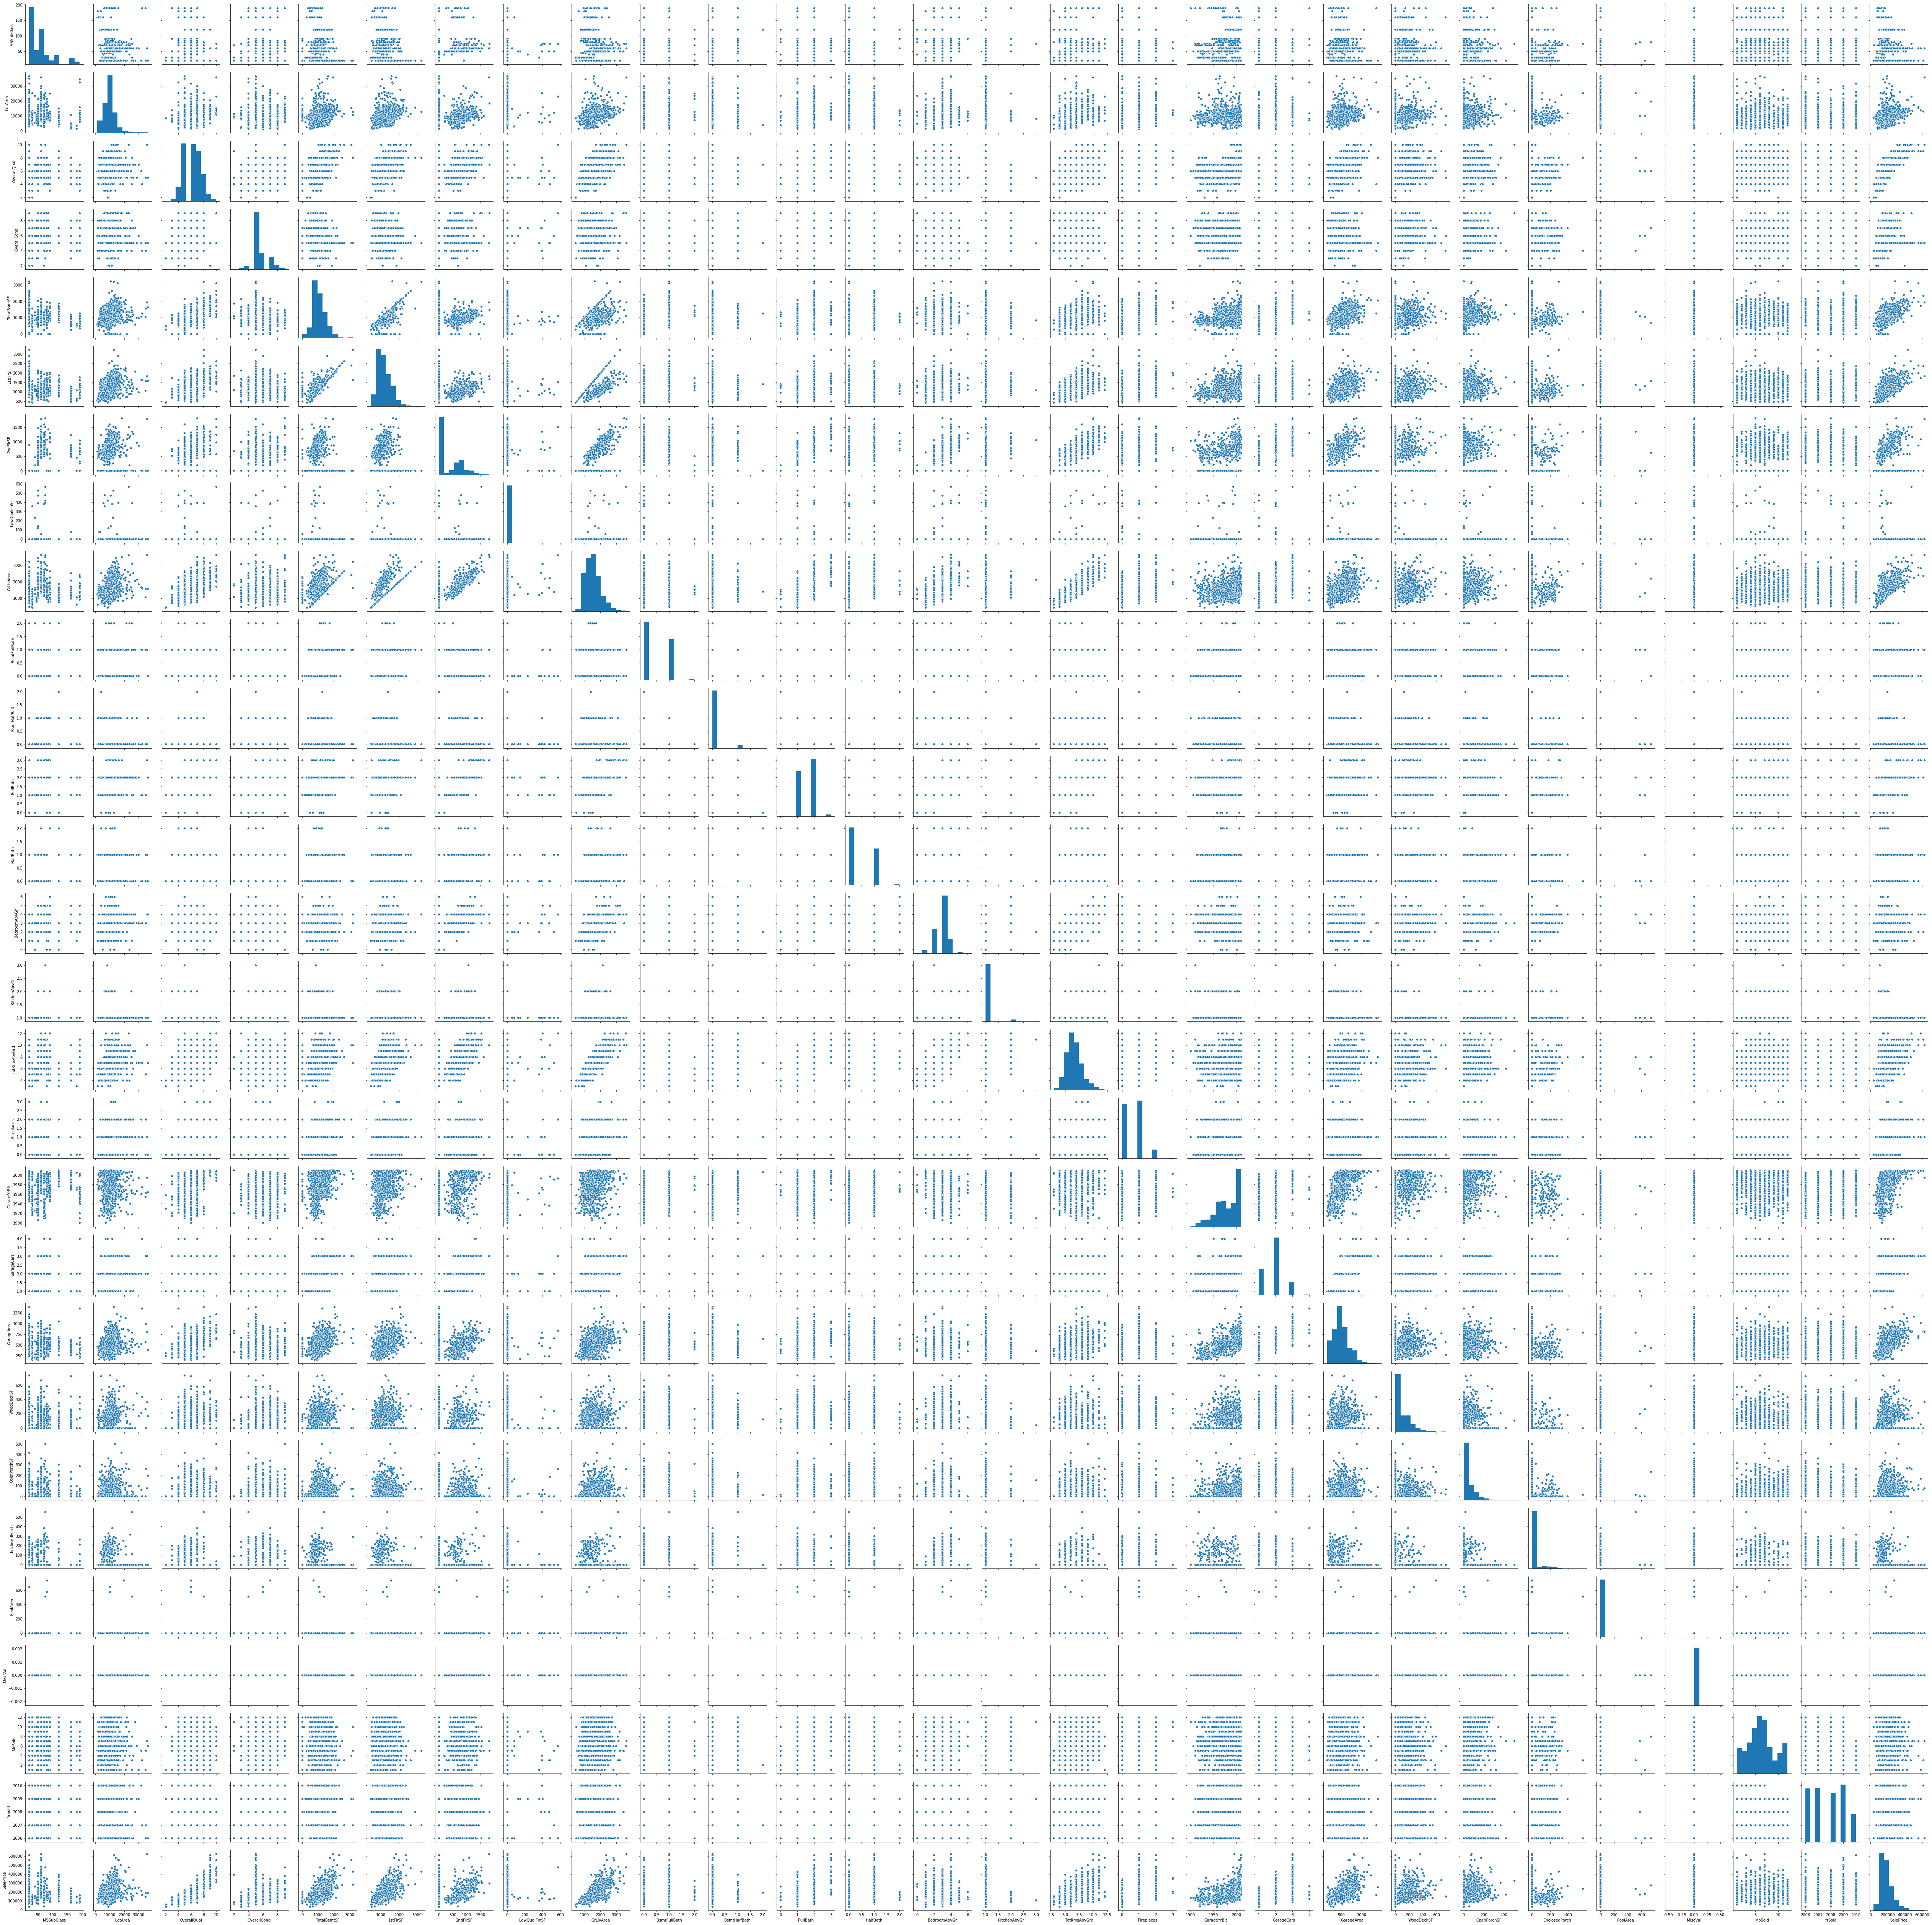

In [302]:
# Pair Plot
plt.figure(figsize=(20, 10))
sns.pairplot(housepr_numeric)
plt.show()

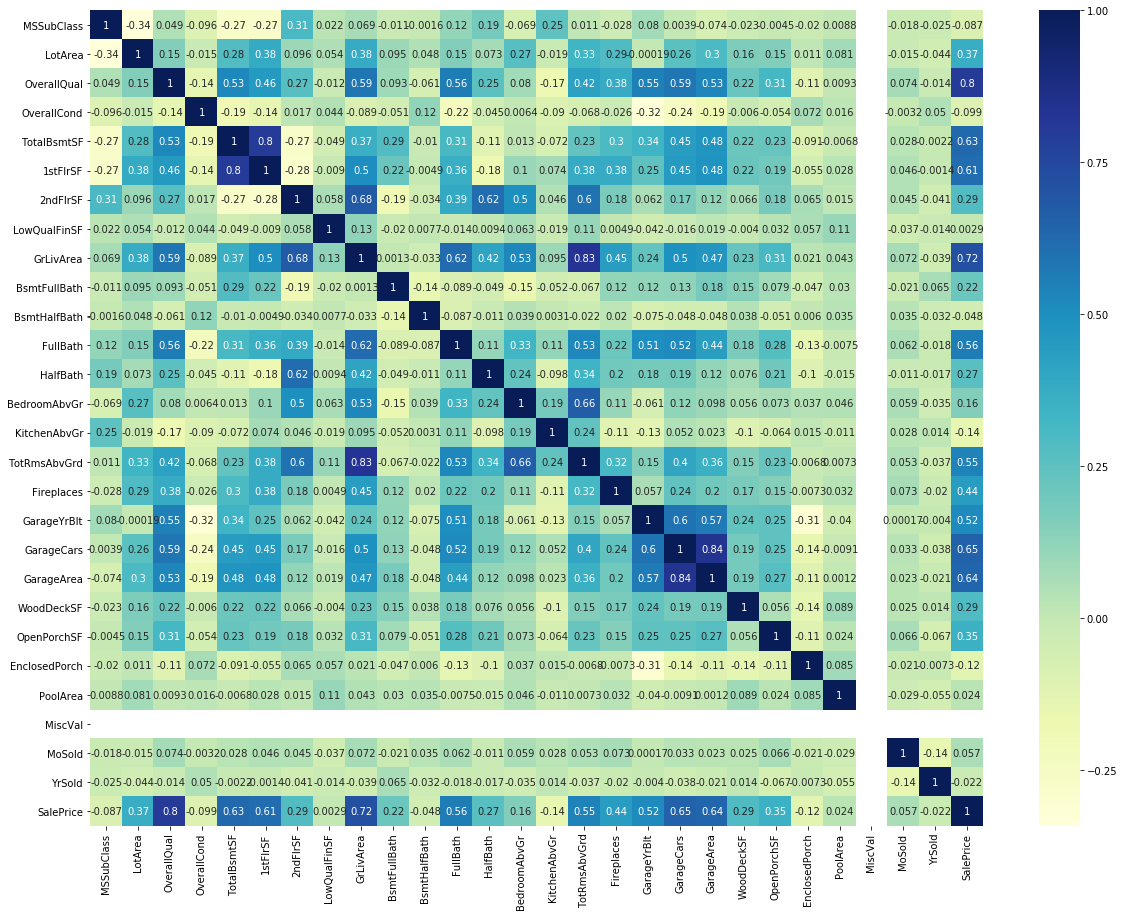

In [303]:
# correlation matrix
cor = housepr_numeric.corr()
plt.figure(figsize=(20,15))
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

## Insights:
1. From the Heatmap we can observe that attributes like OverQual, GrLivArea, GarageCars,GarageArea,FullBath and few other variables clearly have a strong correlation with the dependant variable SalePrice

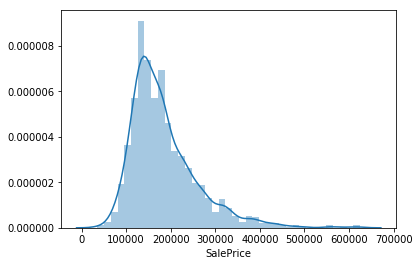

In [304]:
# Dependent and Predictor variable analysis
#Sale Price Histogram
sns.distplot(housepr['SalePrice'])
plt.show()

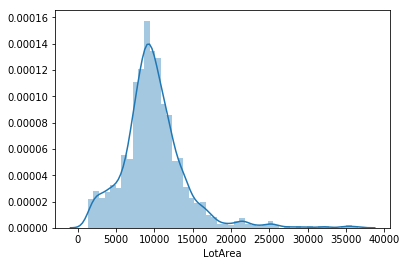

In [305]:
# Lot Area Histogram
sns.distplot(housepr['LotArea'])
plt.show()

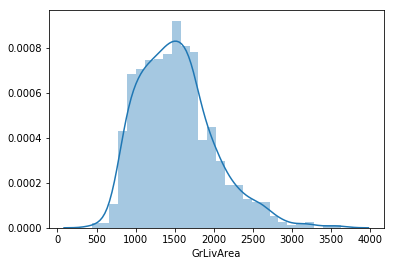

In [306]:
# GrLivArea Histogram
sns.distplot(housepr['GrLivArea'])
plt.show()

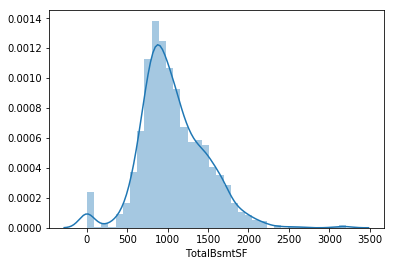

In [307]:
# TotalBsmtSF Histogram
sns.distplot(housepr['TotalBsmtSF'])
plt.show()

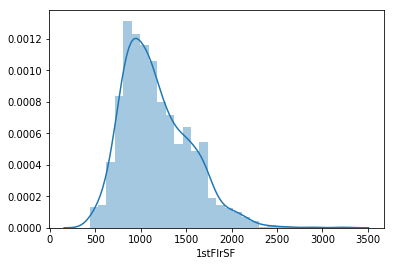

In [308]:
# 1stFlrSF Histogram
sns.distplot(housepr['1stFlrSF'])
plt.show()

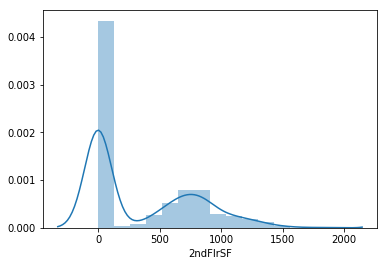

In [309]:
# 2ndFlrSF Histogram
sns.distplot(housepr['2ndFlrSF'])
plt.show()

## Insights:
1. Most predictor variables are normally distributed

In [310]:
housepr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307 entries, 0 to 1459
Data columns (total 68 columns):
Id               1307 non-null int64
MSSubClass       1307 non-null int64
MSZoning         1307 non-null object
LotArea          1307 non-null int64
Street           1307 non-null object
LotShape         1307 non-null object
LandContour      1307 non-null object
Utilities        1307 non-null object
LotConfig        1307 non-null object
LandSlope        1307 non-null object
Neighborhood     1307 non-null object
Condition1       1307 non-null object
Condition2       1307 non-null object
BldgType         1307 non-null object
HouseStyle       1307 non-null object
OverallQual      1307 non-null int64
OverallCond      1307 non-null int64
YearBuilt        1307 non-null object
YearRemodAdd     1307 non-null object
RoofStyle        1307 non-null object
RoofMatl         1307 non-null object
Exterior1st      1307 non-null object
Exterior2nd      1307 non-null object
MasVnrType       1307 no

# Modelling

In [311]:
# split into X and y
X = housepr.loc[:, ['MSSubClass','MSZoning','LotArea','Street','LotShape','LandContour','Utilities',
                    'LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallQual',
                    'OverallCond','YearBuilt','YearRemodAdd','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType',
                    'ExterQual','ExterCond','Foundation','BsmtQual','BsmtExposure','TotalBsmtSF','Heating','HeatingQC','CentralAir','Electrical',
                    '1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
                    'BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Functional','Fireplaces','FireplaceQu',
                    'GarageType','GarageFinish','GarageCars','GarageArea','GarageCond','PavedDrive',
                    'WoodDeckSF','OpenPorchSF','EnclosedPorch','PoolArea','Fence','MiscFeature',
                    'MiscVal','MoSold','YrSold','SaleType','SaleCondition']]

y = housepr['SalePrice']

In [312]:
# creating dummy variables for categorical variables
# subset all categorical variables
housepr_categorical = X.select_dtypes(include=['object'])
housepr_categorical.head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle  YearBuilt  \
0      CollgCr       Norm       Norm     1Fam     2Story  2001-2010   
1       Others      Feedr       Norm     1Fam     1Story  1950-1975   
2      CollgCr       Norm       Norm     1Fam     2Story  1991-2000   
3      Crawfor       Norm       Norm     1Fam     2Story  1872-1925   
4      NoRidge       Norm       Norm     1Fam     2Story  1991-2000   

  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0    2001-2010     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1    1950-1975     Gable  CompShg     MetalSd     MetalSd       None   
2    2001-2010     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3    1950-1975     Gable  CompShg     Wd Sdng     Wd Shng       None   
4    1991-2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

  ExterQual ExterCond Foundation BsmtQual BsmtExposure Heating HeatingQC  \
0        Gd        TA      PConc       Gd           No    GasA        Ex   
1        TA        TA     CBlock       Gd           Gd    GasA        Ex   
2        Gd        TA      PConc       Gd           Mn    GasA        Ex   
3        TA        TA     BrkTil       TA           No    GasA        Gd   
4        Gd        TA      PConc       Gd           Av    GasA        Ex   

  CentralAir Electrical KitchenQual Functional   FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ  No Fireplace     Attchd   
1          Y      SBrkr          TA        Typ  OK Fireplace     Attchd   
2          Y      SBrkr          Gd        Typ  OK Fireplace     Attchd   
3          Y      SBrkr          Gd        Typ  OK Fireplace     Detchd   
4          Y      SBrkr          Gd        Typ  OK Fireplace     Attchd   

  GarageFinish GarageCond PavedDrive     Fence MiscFeature SaleType  \
0          RFn         OK          Y  No Fence        None       WD   
1          RFn         OK          Y  No Fence        None       WD   
2          RFn         OK          Y  No Fence        None       WD   
3          Unf         OK          Y  No Fence        None       WD   
4          RFn         OK          Y  No Fence        None       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3       Abnorml  
4        Normal

In [313]:
# converting categorical variables into dummies
housepr_dummies = pd.get_dummies(housepr_categorical, drop_first=True)
housepr_dummies.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             0             1                0                0   
1             0             0             1                0                0   
2             0             0             0                0                0   
3             0             0             0                0                0   
4             0             0             0                0                0   

   LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  \
0                1                 0                  0              0   
1                1                 0                  0              1   
2                1                 0                  0              0   
3                1                 0                  0              0   
4                1                 0                  0              1   

   LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  \
0              0                 1              0              0   
1              0                 0              0              0   
2              0                 1              0              0   
3              0                 0              0              0   
4              0                 0              0              0   

   Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  \
0                     1                     0                     0   
1                     0                     0                     0   
2                     1                     0                     0   
3                     0                     1                     0   
4                     0                     0                     0   

   Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_Mitchel  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_NAmes  Neighborhood_NWAmes  Neighborhood_NoRidge  \
0                   0                    0                     0   
1                   0                    0                     0   
2                   0                    0                     0   
3                   0                    0                     0   
4                   0                    0                     1   

   Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_Others  \
0                     0                     0                    0   
1                     0                     0                    1   
2                     0                     0                    0   
3                     0                     0                    0   
4                     0                     0                    0   

   Neighborhood_Sawyer  Neighborhood_SawyerW  Neighborhood_Somerst  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   

   Neighborhood_Timber  Condition1_Feedr  Condition1_Norm  Condition1_PosA  \
0                    0                 0                1       

In [314]:
# dropping redundant categorical variables 
X = X.drop(list(housepr_categorical.columns), axis=1)

In [315]:
# concatenating dummy variables with X
X = pd.concat([X, housepr_dummies], axis=1)

In [316]:
X.shape

(1307, 197)

In [317]:
# scaling the features
# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=197)

# Ridge and Lasso Regression

In [318]:
#getting categorical variables
cat_feat = list(housepr.dtypes[housepr.dtypes == 'object'].index)
#Encoding the categorical variables
for c in cat_feat:
    lbl = LabelEncoder() 
    lbl.fit(list(housepr[c].values)) 
    housepr[c] = lbl.transform(list(housepr[c].values))   

In [319]:
housepr.head()

Id  MSSubClass  MSZoning  LotArea  Street  LotShape  LandContour  \
0   1          60         3     8450       1         3            3   
1   2          20         3     9600       1         3            3   
2   3          60         3    11250       1         0            3   
3   4          70         3     9550       1         0            3   
4   5          60         3    14260       1         0            3   

   Utilities  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0          0          4          0             1           2           2   
1          0          2          0            12           1           2   
2          0          4          0             1           2           2   
3          0          0          0             2           2           2   
4          0          2          0             9           2           2   

   BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         0           5            7            5          5             4   
1         0           2            6            8          2             1   
2         0           5            7            5          4             4   
3         0           5            7            5          0             1   
4         0           5            8            5          4             3   

   RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  ExterQual  \
0          1         0           11           13           1          2   
1          1         0            7            8           2          3   
2          1         0           11           13           1          2   
3          1         0           12           15           2          3   
4          1         0           11           13           1          2   

   ExterCond  Foundation  BsmtQual  BsmtExposure  TotalBsmtSF  Heating  \
0          3           2         0             3          856        1   
1          3           1         0             1         1262        1   
2          3           2         0             2          920        1   
3          3           0         2             3          756        1   
4          3           2         0             0         1145        1   

   HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0          0           1           1       856       854             0   
1          0           1           1      1262         0             0   
2          0           1           1       920       866             0   
3          2           1           1       961       756             0   
4          0           1           1      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  \
0             1            2             8           6           0   
1             1            3             6           6           1   
2             1            2             6           6           1   
3             1            2             7           6           1   
4             1            2             9           6           1   

   FireplaceQu  GarageType  GarageYrBlt  GarageFinish  GarageCars  GarageArea  \
0            0           0       2003.0             1           2         548   
1            1           0       1976.0             1           2         460   
2            1           0       2001.0             1           2         608   
3            1           2       1998.0             2           3         642   
4            1

In [320]:
housepr_train, housepr_test = train_test_split(housepr, test_size=0.3, random_state=42)
print(housepr_train.shape)
print(housepr_test.shape)

(914, 68)
(393, 68)


In [321]:
#Scaling dataframe using MinMax scaler
cols = housepr_train.columns

In [322]:
scaler = MinMaxScaler()
housepr_train[cols] = scaler.fit_transform(housepr_train[cols])

In [323]:
#transforming the test data set
housepr_test[cols] = scaler.transform(housepr_test[cols])

In [324]:
#checking minmax scaling
housepr_train.describe()

Id  MSSubClass    MSZoning     LotArea      Street    LotShape  \
count  914.000000  914.000000  914.000000  914.000000  914.000000  914.000000   
mean     0.506348    0.208907    0.754923    0.238530    0.998906    0.633115   
std      0.293115    0.237886    0.155152    0.117059    0.033077    0.475356   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.250857    0.000000    0.750000    0.176648    1.000000    0.000000   
50%      0.512003    0.176471    0.750000    0.228236    1.000000    1.000000   
75%      0.761145    0.294118    0.750000    0.286183    1.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

       LandContour   Utilities   LotConfig   LandSlope  Neighborhood  \
count   914.000000  914.000000  914.000000  914.000000    914.000000   
mean      0.940919    0.001094    0.743435    0.020788      0.490563   
std       0.210844    0.033077    0.410648    0.107776      0.293612   
min       0.000000    0.000000    0.000000    0.000000      0.000000   
25%       1.000000    0.000000    0.250000    0.000000      0.250000   
50%       1.000000    0.000000    1.000000    0.000000      0.437500   
75%       1.000000    0.000000    1.000000    0.000000      0.750000   
max       1.000000    1.000000    1.000000    1.000000      1.000000   

       Condition1  Condition2    BldgType  HouseStyle  OverallQual  \
count  914.000000  914.000000  914.000000  914.000000   914.000000   
mean     0.256154    0.334427    0.120350    0.439825     0.527899   
std      0.115150    0.038988    0.302665    0.273741     0.168167   
min      0.000000    0.000000    0.000000    0.000000     0.000000   
25%      0.250000    0.333333    0.000000    0.285714     0.375000   
50%      0.250000    0.333333    0.000000    0.285714     0.500000   
75%      0.250000    0.333333    0.000000    0.714286     0.625000   
max      1.000000    1.000000    1.000000    1.000000     1.000000   

       OverallCond   YearBuilt  YearRemodAdd   RoofStyle    RoofMatl  \
count   914.000000  914.000000    914.000000  914.000000  914.000000   
mean      0.507971    0.570678      0.604759    0.355580    0.009190   
std       0.154483    0.328317      0.362587    0.208819    0.083743   
min       0.000000    0.000000      0.000000    0.000000    0.000000   
25%       0.428571    0.400000      0.250000    0.250000    0.000000   
50%       0.428571    0.400000      0.750000    0.250000    0.000000   
75%       0.571429    1.000000      1.000000    0.250000    0.000000   
max       1.000000    1.000000      1.000000    1.000000    1.000000   

       Exterior1st  Exterior2nd  MasVnrType   ExterQual   ExterCond  \
count   914.000000   914.000000  914.000000  914.000000  914.000000   
mean      0.669500     0.694821    0.584610    0.835157    0.951495   
std       0.240501     0.234319    0.209199    0.237752    0.137630   
min       0.000000     0.000000    0.000000    0.000000    0.000000   
25%       0.538462     0.533333    0.333333    0.666667    1.000000   
50%       0.846154     0.866667    0.666667    1.000000    1.000000   
75%       0.846154     0.866667    0.666667    1.000000    1.000000   
max       1.000000     1.000000    1.000000    1.000000    1.000000   

       Foundation    BsmtQual  BsmtExposure  TotalBsmtSF     Heating  \
count  914.000000  914.000000    914.000000   914.000000  914.000000   
mean     0.284683    0.502188      0.577407     0.333456    0.206127   
std      0.138073    0.466273      0.291747     0.127750    0.058135   
min      0.000000    0.000000      0.000000     0.000000    0.000000   
25%      0.200000    0.000000      0.500000     0.252266    0.200000   
50%      0.200000    0.500000      0.750000     0.314531    0.200000   
75%      0.400000    1.000000      0.750000     0.406719    0.200000   
max      1.000000    1.000000      1.000000     1.000000    1.000000   

        HeatingQC  CentralAir  Electrical    1stFlrSF    2ndFlrSF  

In [325]:
# divide into X_train, y_train, X_test, y_test
y_train = housepr_train.pop('SalePrice')
X_train = housepr_train

y_test = housepr_test.pop('SalePrice')
X_test = housepr_test

Modelling Approach:

Multiple linear regression using feature selection by cross validation
Ridge Regression
Lasso Regression


In [326]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 40))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)               

Fitting 5 folds for each of 39 candidates, totalling 195 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 195 out of 195 | elapsed:   15.8s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
       error_score='raise-deprecating',
       estimator=RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
  n_features_to_select=None, step=1, verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [327]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.127935      0.014257         0.000997        0.000631   
1       0.092222      0.006505         0.000997        0.000631   
2       0.095068      0.003619         0.000598        0.000489   
3       0.086379      0.004700         0.000412        0.000823   
4       0.086347      0.004689         0.000412        0.000824   

  param_n_features_to_select                       params  split0_test_score  \
0                          1  {'n_features_to_select': 1}           0.625259   
1                          2  {'n_features_to_select': 2}           0.687661   
2                          3  {'n_features_to_select': 3}           0.687193   
3                          4  {'n_features_to_select': 4}           0.781146   
4                          5  {'n_features_to_select': 5}           0.796106   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.606269           0.601085           0.636105           0.683280   
1           0.702781           0.673187           0.692232           0.758090   
2           0.700793           0.737656           0.697751           0.822347   
3           0.801529           0.748727           0.743933           0.831805   
4           0.808581           0.738829           0.760930           0.865912   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.630342        0.029279               39            0.641801   
1         0.702730        0.029198               38            0.729221   
2         0.729046        0.049547               37            0.733965   
3         0.781373        0.032892               36            0.792502   
4         0.793993        0.043607               35            0.818237   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.645010            0.645899            0.638588   
1            0.723942            0.748400            0.724683   
2            0.728847            0.799659            0.727932   
3            0.787446            0.809355            0.798713   
4            0.814208            0.822222            0.823129   

   split4_train_score  mean_train_score  std_train_score  
0            0.619287          0.638117         0.009762  
1            0.723895          0.730028         0.009396  
2            0.775311          0.753143         0.029151  
3            0.781798          0.793963         0.009509  
4            0.805294          0.816618         0.006488

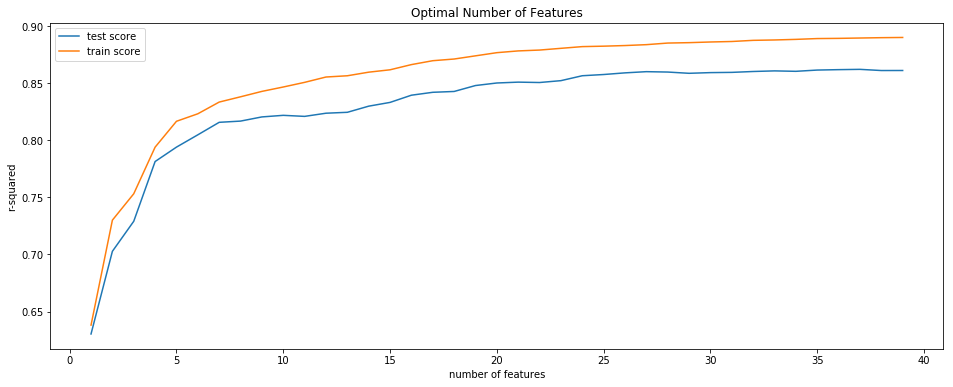

In [328]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [329]:
#checking the best no of features to select
model_cv.best_params_

{'n_features_to_select': 37}

In [330]:
# final model with best parameters
n_features_optimal = model_cv.best_params_['n_features_to_select']
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

In [331]:
# predict prices of X_train
y_train_pred = rfe.predict(X_train)
print('R2 score of Training Data:',r2_score(y_train,y_train_pred).round(4))
print('Mean Squared Error of Training Data :',mean_squared_error(y_train,y_train_pred).round(4))

R2 score of Training Data: 0.8875
Mean Squared Error of Training Data : 0.002


In [332]:
# predict prices of X_test
y_test_pred = rfe.predict(X_test)
print('R2 score of Test Data :',r2_score(y_test,y_test_pred).round(4))
print('Mean Squared Error of Test Data :',mean_squared_error(y_test,y_test_pred).round(4))

R2 score of Test Data : 0.8645
Mean Squared Error of Test Data : 0.0019


Lasso Regression

In [333]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]}

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 23 candidates, totalling 115 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed:    0.7s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
       error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [334]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.010991      0.002689         0.001598        0.001957      0.0001   
1       0.004793      0.001598         0.001598        0.001957       0.001   
2       0.002397      0.001957         0.003196        0.001598        0.01   
3       0.000799      0.001597         0.000798        0.001597        0.05   
4       0.009090      0.004868         0.005521        0.005281         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.033534          -0.032412          -0.035403   
1   {'alpha': 0.001}          -0.037263          -0.032469          -0.035679   
2    {'alpha': 0.01}          -0.065994          -0.060539          -0.063641   
3    {'alpha': 0.05}          -0.099223          -0.095157          -0.094848   
4     {'alpha': 0.1}          -0.099223          -0.095157          -0.094848   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.033517          -0.031001        -0.033176        0.001449   
1          -0.035130          -0.033392        -0.034788        0.001695   
2          -0.059277          -0.068361        -0.063557        0.003358   
3          -0.091637          -0.109640        -0.098089        0.006244   
4          -0.091637          -0.109640        -0.098089        0.006244   

   rank_test_score  split0_train_score  split1_train_score  \
0                1           -0.030021           -0.031042   
1                2           -0.032556           -0.034839   
2                3           -0.062213           -0.062415   
3                4           -0.097991           -0.099302   
4                4           -0.097991           -0.099302   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.030567           -0.030961           -0.031001   
1           -0.033176           -0.033684           -0.033593   
2           -0.061502           -0.062581           -0.062424   
3           -0.099160           -0.099530           -0.093243   
4           -0.099160           -0.099530           -0.093243   

   mean_train_score  std_train_score  
0         -0.030719         0.000388  
1         -0.033570         0.000749  
2         -0.062227         0.000381  
3         -0.097845         0.002362  
4         -0.097845         0.002362

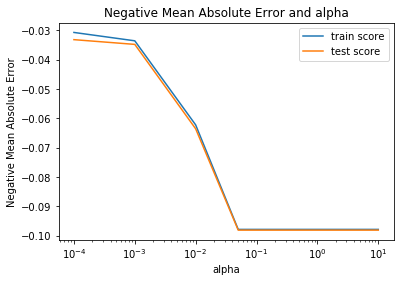

In [335]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.xscale('log')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'])
plt.show()

In [336]:
#checking the best alpha to select
model_cv.best_params_

{'alpha': 0.0001}

In [337]:
#fitting the lasso model on best alpha
alpha = model_cv.best_params_['alpha']

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [338]:
# predict
y_train_pred = lasso.predict(X_train)
print('R2 score of Training Data:',r2_score(y_true=y_train, y_pred=y_train_pred).round(4))
y_test_pred = lasso.predict(X_test)
print('R2 score of Test Data:',r2_score(y_true=y_test, y_pred=y_test_pred).round(4))

R2 score of Training Data: 0.888
R2 score of Test Data: 0.8712


In [339]:
# lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', -0.072),
 ('Id', -0.006),
 ('MSSubClass', -0.015),
 ('MSZoning', -0.004),
 ('LotArea', 0.093),
 ('Street', 0.0),
 ('LotShape', -0.001),
 ('LandContour', -0.005),
 ('Utilities', -0.0),
 ('LotConfig', -0.002),
 ('LandSlope', -0.0),
 ('Neighborhood', 0.002),
 ('Condition1', -0.0),
 ('Condition2', -0.0),
 ('BldgType', -0.0),
 ('HouseStyle', 0.002),
 ('OverallQual', 0.133),
 ('OverallCond', 0.054),
 ('YearBuilt', 0.045),
 ('YearRemodAdd', -0.001),
 ('RoofStyle', 0.028),
 ('RoofMatl', -0.031),
 ('Exterior1st', -0.019),
 ('Exterior2nd', 0.0),
 ('MasVnrType', 0.034),
 ('ExterQual', -0.056),
 ('ExterCond', 0.004),
 ('Foundation', 0.007),
 ('BsmtQual', 0.017),
 ('BsmtExposure', -0.019),
 ('TotalBsmtSF', 0.116),
 ('Heating', 0.0),
 ('HeatingQC', -0.005),
 ('CentralAir', 0.0),
 ('Electrical', -0.003),
 ('1stFlrSF', 0.035),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.01),
 ('GrLivArea', 0.343),
 ('BsmtFullBath', 0.038),
 ('BsmtHalfBath', 0.01),
 ('FullBath', 0.017),
 ('HalfBath', 0.007),

Ridge Regression

In [340]:
#using cross validation to tune hyperparameter alpha in ridge regression
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,100.0,1000.0]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 100.0, 1000.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [341]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.003428      0.003623         0.000799        0.001598      0.0001   
1       0.003195      0.001598         0.000799        0.001598       0.001   
2       0.003924      0.006051         0.001078        0.001556        0.01   
3       0.003125      0.006249         0.002408        0.004815        0.05   
4       0.005232      0.004337         0.000406        0.000812         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.031408          -0.033654          -0.035009   
1   {'alpha': 0.001}          -0.031406          -0.033654          -0.035008   
2    {'alpha': 0.01}          -0.031390          -0.033653          -0.034995   
3    {'alpha': 0.05}          -0.031327          -0.033648          -0.034942   
4     {'alpha': 0.1}          -0.031283          -0.033643          -0.034880   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.032376          -0.037217        -0.033929        0.002039   
1          -0.032376          -0.037216        -0.033928        0.002039   
2          -0.032368          -0.037203        -0.033918        0.002039   
3          -0.032338          -0.037148        -0.033877        0.002036   
4          -0.032310          -0.037082        -0.033836        0.002024   

   rank_test_score  split0_train_score  split1_train_score  \
0               21           -0.032014           -0.030710   
1               20           -0.032014           -0.030710   
2               19           -0.032011           -0.030709   
3               18           -0.031998           -0.030701   
4               16           -0.031983           -0.030695   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.030403           -0.030942           -0.029443   
1           -0.030403           -0.030942           -0.029443   
2           -0.030402           -0.030941           -0.029442   
3           -0.030396           -0.030939           -0.029439   
4           -0.030392           -0.030936           -0.029439   

   mean_train_score  std_train_score  
0         -0.030702         0.000831  
1         -0.030702         0.000831  
2         -0.030701         0.000830  
3         -0.030695         0.000828  
4         -0.030689         0.000823

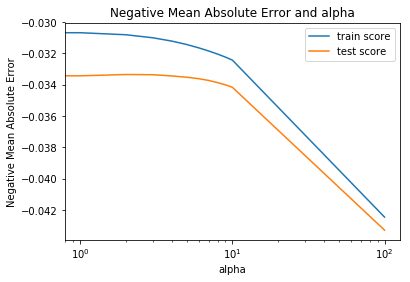

In [342]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.xscale('log')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'])
plt.show()

In [343]:
#checking the best alpha to select
model_cv.best_params_

{'alpha': 2.0}

In [344]:
# final model with best parameters
alpha = model_cv.best_params_['alpha']
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
#ridge.coef_

Ridge(alpha=2.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [345]:
# predict
y_train_pred = ridge.predict(X_train)
print('R2 score of Training Data:',r2_score(y_true=y_train, y_pred=y_train_pred).round(4))
y_test_pred = ridge.predict(X_test)
print('R2 score of Test Data:',r2_score(y_true=y_test, y_pred=y_test_pred).round(4))

R2 score of Training Data: 0.8875
R2 score of Test Data: 0.8764


In [346]:
#getting coefficients of model
ridge.coef_

array([-8.39106129e-03, -1.57899947e-02, -4.45057338e-03,  8.56363134e-02,
        1.45834731e-02, -1.67404584e-03, -9.99413318e-03, -1.74416672e-02,
       -3.37225610e-03, -3.53809046e-03,  3.87848406e-03, -5.77806228e-03,
       -1.02999015e-02,  1.47227029e-04, -1.85632840e-04,  1.22436223e-01,
        5.31917096e-02,  3.64862817e-02, -2.17041747e-03,  3.11187833e-02,
       -2.69758194e-02, -2.35993017e-02,  5.73816431e-03,  3.14899741e-02,
       -5.88872508e-02,  7.62111861e-03,  1.45215003e-02,  1.60145024e-02,
       -2.14356842e-02,  1.13649872e-01,  1.74113089e-02, -6.63878478e-03,
        3.46578311e-03, -4.81502690e-03,  1.34795976e-01,  7.09404016e-02,
       -2.91567633e-03,  1.57360291e-01,  4.08569285e-02,  1.09788831e-02,
        3.16737754e-02,  1.36563487e-02, -8.64506284e-02, -4.15858537e-02,
       -4.50479270e-02,  5.58291426e-02,  5.12216990e-02,  2.46799260e-02,
       -5.65922571e-03,  8.66538451e-03,  2.07676722e-03, -7.77109231e-03,
        3.95737924e-02,  

Model Selection

1. Ridge:
- R2 score of Training Data: 0.8875
- R2 score of Test Data: 0.8764

2. Lasso:
- R2 score of Training Data: 0.888
- R2 score of Test Data: 0.8712

3. Simple Linear Regression
- R2 score of Training Data: 0.8875
- R2 score of Test Data : 0.8645

Based on R2 score the difference between train and test R2 score is less for Ridge regression. Hence Ridge regression can be selected here.